In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm
import pandas as pd
from glob import glob
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from glob import glob
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import os

In [ ]:
INPUT_DIM = (128, 128, 3)

In [ ]:
from PIL import Image, ImageOps


def load_list_images(images):
    images = [np.asarray(get_image(n)) for n in images]
    return np.stack(images) / 255


def get_image(image_path):
    img = Image.open(image_path)
    img = img.resize(INPUT_DIM[:2], Image.ANTIALIAS)
    # img = np.expand_dims(ImageOps.grayscale(img), -1)
    return img

In [ ]:
PATH_DATA = os.getcwd() + "/sampledata"
filenames_paths = np.array(glob(PATH_DATA + "/*.jpg"))
filenames = [f.split("/")[-1] for f in filenames_paths]

In [ ]:
PATH_MODELS = "Embedding_200"

In [ ]:
encoder = keras.models.load_model(PATH_MODELS + "/encoder")
decoder = keras.models.load_model(PATH_MODELS + "/decoder")

/tmp/ipykernel_4200/3637685877.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(INPUT_DIM[:2], Image.ANTIALIAS)


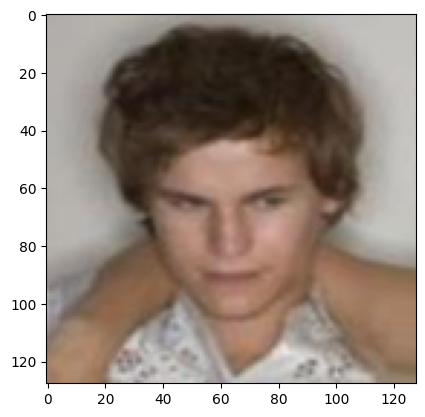

In [ ]:
image = get_image(filenames_paths[2])
plt.imshow(image)

In [ ]:
encoded_image = encoder(np.expand_dims(image, 0) / 255.0, training=False)

In [ ]:
decoded_image = decoder.predict(encoded_image[0])

1/1 [==============================] - 0s 217ms/step


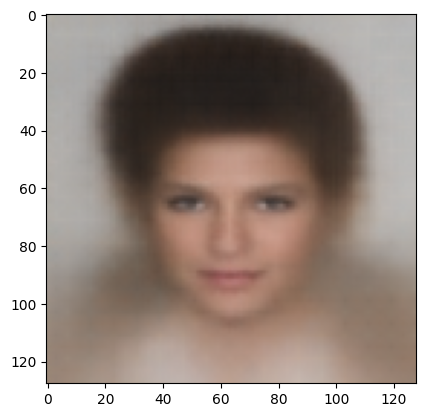

In [ ]:
plt.imshow(decoded_image.squeeze())

# Operaciones

In [ ]:
att = pd.read_csv(os.path.join(PATH_DATA, "list_attr_celeba.csv"))
att = att[att["image_id"].isin(filenames)]

In [ ]:
att.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
field = "Male"

In [ ]:
positive = att[att[field] == 1]["image_id"]
negative = att[att[field] == -1]["image_id"]

In [ ]:
filenames_positive = [os.getcwd() + "/sampledata/" + f for f in positive]
filenames_negative = [os.getcwd() + "/sampledata/" + f for f in negative]

In [ ]:
images_positive = load_list_images(filenames_positive[:100])
images_negative = load_list_images(filenames_negative[:100])
print(f"Positive images: {len(images_positive)}")
print(f"Negative images: {len(images_negative)}")

/tmp/ipykernel_4200/3637685877.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(INPUT_DIM[:2], Image.ANTIALIAS)


Positive images: 100
Negative images: 100


In [ ]:
X_positive = np.mean(encoder.predict(images_positive)[2], axis=0)
X_negative = np.mean(encoder.predict(images_negative)[2], axis=0)

1/4 [======>.......................] - ETA: 0s

2023-01-08 14:27:43.612196: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19660800 exceeds 10% of free system memory.


4/4 [==============================] - 0s 14ms/step


In [ ]:
v = X_positive - X_negative

1/1 [==============================] - 0s 16ms/step


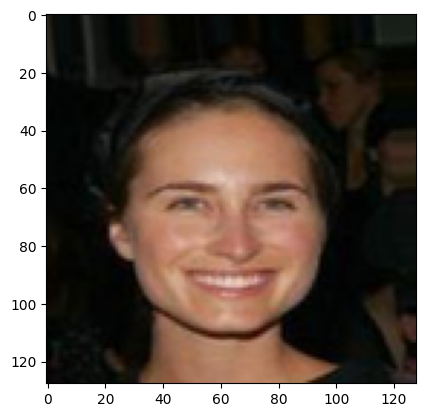

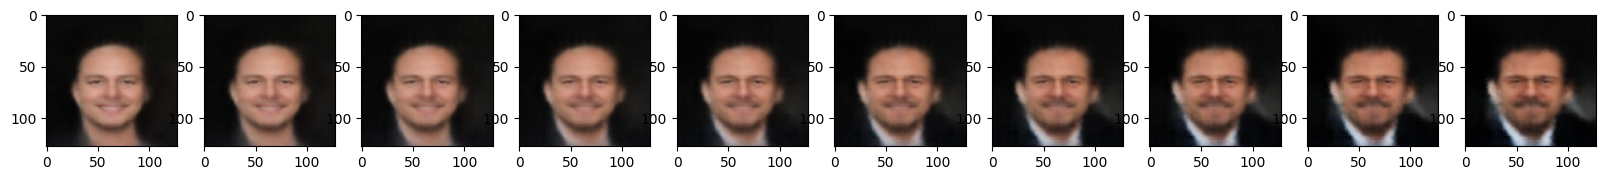

In [ ]:
a = 0

fig, axs = plt.subplots(1, 1)
axs.imshow(images_negative[a, :, :, :])

X = encoder.predict(images_negative[[a], :, :, :])[2]

fig, axs = plt.subplots(1, 10, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()):
    generated_z = X + i / 3 * v
    ax.imshow(decoder.predict(generated_z).squeeze())

1/1 [==============================] - 0s 22ms/step


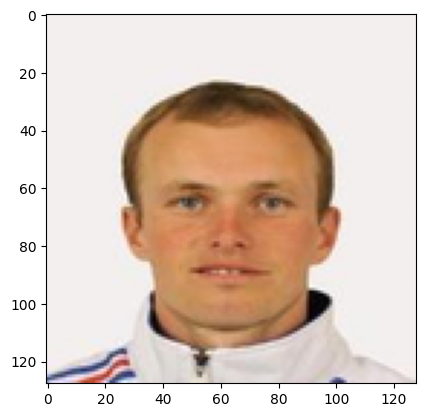

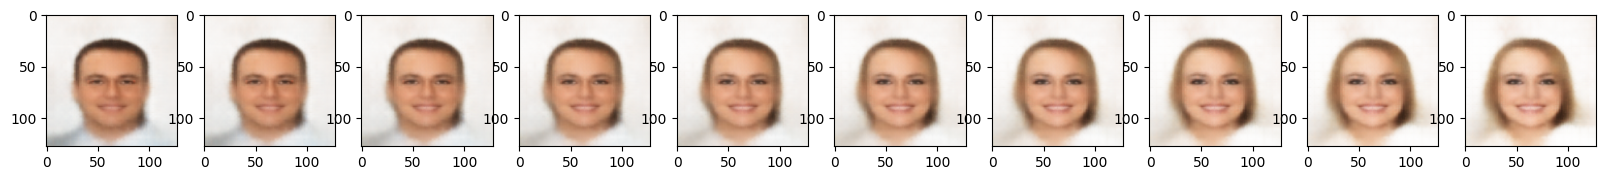

In [ ]:
a = 4

fig, axs = plt.subplots(1, 1)
axs.imshow(images_positive[a, :, :, :])

X = encoder.predict(images_positive[[a], :, :, :])[2]

fig, axs = plt.subplots(1, 10, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()):
    generated_z = X - i / 3 * v
    ax.imshow(decoder.predict(generated_z).squeeze())